# Stroke

Stroke is a critical disease that occurs when the blood supply to part of brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. In this circumstace, brain cells begin to die in minutes. 

![title](Datascience/1017StrokePTSD_SC.jpg)

Due to the risks associated with stroke, a prompt treatment is crucial for patient survival. Early action can reduce brain damage and other complications.

Symptoms of stroke include:

* **Face drooping;**
* **Arm weakness;**
* **Speech difficulty;**

Some interesting points about stroke are:

* **Causes of strokes include ischemia (loss of blood supply) or hemorrhage (bleeding) in the brain;**
* **People at risk for stroke include those who have high blood pressure, high cholesterol, diabetes, and those who smoke. People with heart rhythm disturbances, are also at risk;**
* **Stroke is diagnosed by the patient's symptoms, history, and blood and imaging tests;**

In order to avoid a stroke:

* **You can prevent stroke by quitting smoking, controlling blood pressure, maintaining a healthy weight, eating a healthy diet, and exercising on a regular basis.**

### Once the goal has been discussed, it's time to begin the project. Thus let's do it! 

In [1]:
#--------------------------------- Dataset manipulation ---------------------------------#
import pandas as pd
import numpy as np

#------------------------------------- Graphics -----------------------------------------#
import matplotlib.pyplot as plt
import seaborn as sns

#--------------------------------- Features balancing -----------------------------------#
from imblearn.over_sampling import SMOTE


#---------------------------------- Machine learning ------------------------------------#
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

/home/arley/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


### Dataset initial information

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In this initial information we can see "bmi" feature has some missing values. In order to fill these values let's take a look in some other features and see if they are correlated

###  Continuous variables

/home/arley/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/arley/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/arley/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

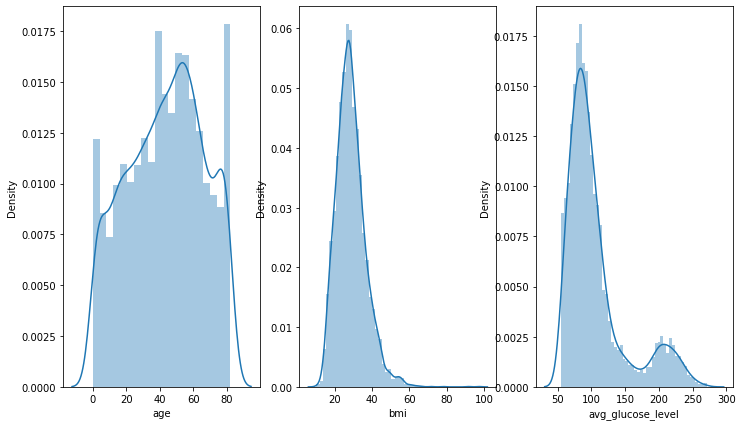

In [4]:
continuous = ["age", "bmi", "avg_glucose_level"]

fig, ax = plt.subplots(1, 3, figsize = (12, 7))

for i, ax in enumerate(fig.axes):
    sns.distplot(x = df[continuous[i]], ax = ax, axlabel = continuous[i])

### Correlation between continuous variables

<AxesSubplot:>

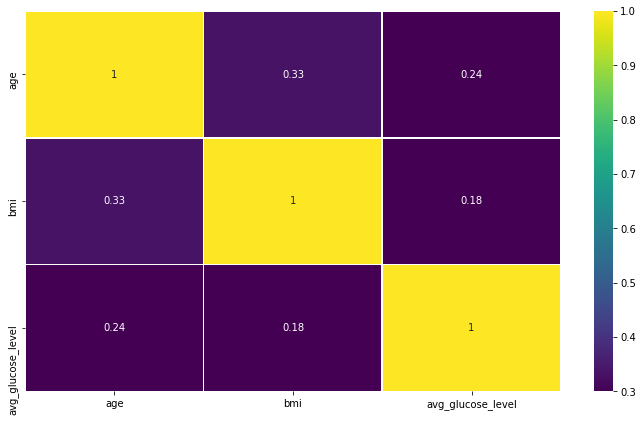

In [5]:
plt.figure(figsize = (12, 7))

correlation = df[continuous].corr()
sns.heatmap(correlation, cmap='viridis', annot=True, vmax = 1.0,
            vmin = 0.3, linewidths=.5, data = df[continuous])

This matrix show the linear correlation among continuous variables are not so strong. But maybe there is a non-linear correlation. 

<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

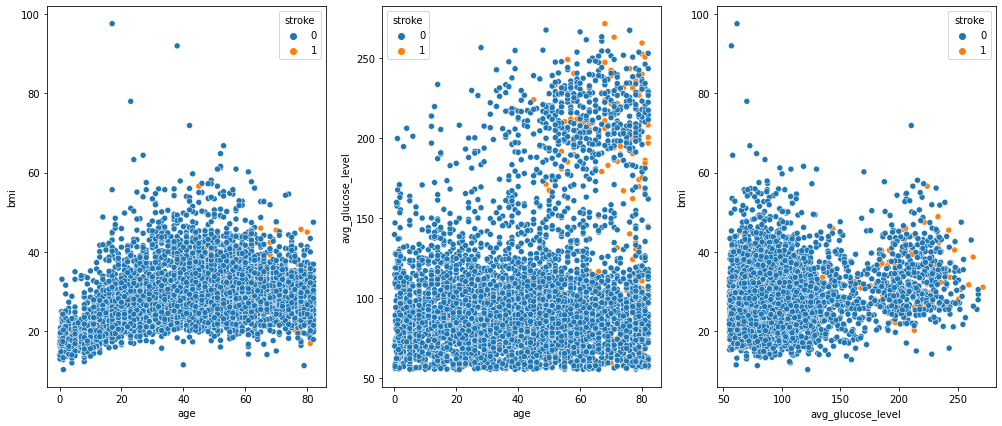

In [6]:
fig, ax = plt.subplots(1, 3, figsize = (17, 7))
continuous = ["age", "bmi", "avg_glucose_level"]

sns.scatterplot(x = df["age"], y = df["bmi"], ax = fig.axes[0], data = df, hue = "stroke")
sns.scatterplot(x = df["age"], y = df["avg_glucose_level"], ax = fig.axes[1], data = df, hue = "stroke")
sns.scatterplot(x = df["avg_glucose_level"], y = df["bmi"], ax = fig.axes[2], data = df, hue = "stroke")

### Correlations between bmi and categorical variables

In [7]:
categorical = df.columns
continuous = ["id", "age", "avg_glucose_level", "bmi", "_"]

cont = 0
for j, cat in enumerate(categorical):
    
        if(cat != continuous[cont]):
            print("#---------------------", cat, "-----------------------#")
            print(df.groupby([cat])["bmi"].mean())
            print("")
            
        else:
            cont += 1
            

#--------------------- gender -----------------------#
gender
Female    29.065758
Male      28.647936
Other     22.400000
Name: bmi, dtype: float64

#--------------------- hypertension -----------------------#
hypertension
0    28.474069
1    33.036585
Name: bmi, dtype: float64

#--------------------- heart_disease -----------------------#
heart_disease
0    28.819117
1    30.316461
Name: bmi, dtype: float64

#--------------------- ever_married -----------------------#
ever_married
No     25.214721
Yes    30.850749
Name: bmi, dtype: float64

#--------------------- work_type -----------------------#
work_type
Govt_job         30.522063
Never_worked     25.545455
Private          30.304625
Self-employed    30.211871
children         20.038003
Name: bmi, dtype: float64

#--------------------- Residence_type -----------------------#
Residence_type
Rural    28.894212
Urban    28.892289
Name: bmi, dtype: float64

#--------------------- smoking_status -----------------------#
smoking_status
U

### Correlations between age and categorical variables

In [8]:
categorical = df.columns
continuous = ["id", "age", "avg_glucose_level", "bmi", "_"]

cont = 0
for j, cat in enumerate(categorical):
    
        if(cat != continuous[cont]):
            print("#---------------------", cat, "-----------------------#")
            print(df.groupby([cat])["age"].mean())
            print("")
            
        else:
            cont += 1

#--------------------- gender -----------------------#
gender
Female    43.757395
Male      42.483385
Other     26.000000
Name: age, dtype: float64

#--------------------- hypertension -----------------------#
hypertension
0    41.173027
1    62.244980
Name: age, dtype: float64

#--------------------- heart_disease -----------------------#
heart_disease
0    41.801407
1    68.188406
Name: age, dtype: float64

#--------------------- ever_married -----------------------#
ever_married
No     22.014229
Yes    54.342082
Name: age, dtype: float64

#--------------------- work_type -----------------------#
work_type
Govt_job         50.879756
Never_worked     16.181818
Private          45.503932
Self-employed    60.201465
children          6.841339
Name: age, dtype: float64

#--------------------- Residence_type -----------------------#
Residence_type
Rural    42.900811
Urban    43.542126
Name: age, dtype: float64

#--------------------- smoking_status -----------------------#
smoking_status
U

An interesting point in these results is a possible relationship between "work_type" and "bmi". People classified as 'children' has an average age of 6.8 years, and a low 'bmi'. This is totally accepted because children have a low body mass index. For the case 'Never_worked' the age is about 16 years, revealing a considered amount of teenagers. This group should have a low 'bmi', although it has to be higher than 'children' group. The remained three other groups of "work_type" seems to have a good proportion of adults, so these groups must take almost the same 'bmi' and higher than 'children' and 'Never_worked'.  

### Filling missing values on "bmi"

In [9]:
filter_children = df["work_type"] == "children"
filter_teenager = df["work_type"] == "Never_worked"

df["bmi"][filter_children] = df["bmi"][filter_children].fillna(20.03)
df["bmi"][filter_teenager] = df["bmi"][filter_teenager].fillna(25.54)
df["bmi"] = df["bmi"].fillna(30.30)
print("Total de valores missing em 'bmi': ", df["bmi"].isnull().sum())

Total de valores missing em 'bmi':  0


/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Checking "Unknown's" amount in 'gender' and 'smoking_status'

In [10]:
print("#------------------------- Gender ------------------------------#")
print(df["gender"].value_counts())

print("")

print("#------------------------- Smoking ------------------------------#")
print(df["smoking_status"].value_counts())

#------------------------- Gender ------------------------------#
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

#------------------------- Smoking ------------------------------#
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

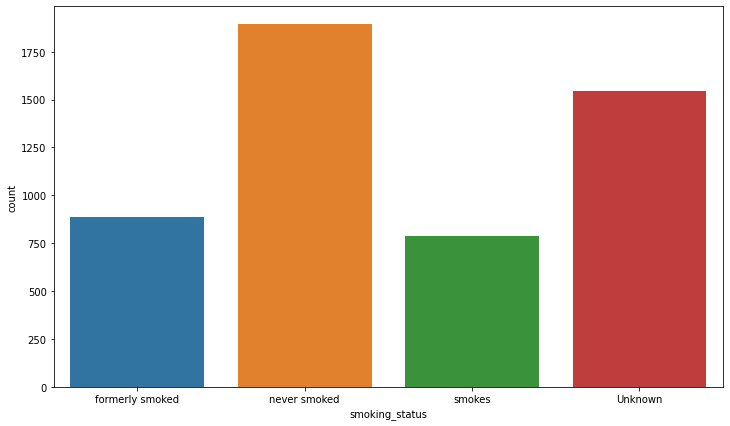

In [11]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df, x = "smoking_status")

'gender' situation is easier than 'smoking_status' because there is only one case classificated as 'Other'. In 'smoking_status' there are 1544 cases classified as 'Unknown' which corresponds to 30.21% of the entire feature. 

For "smoking_status" a possible solution might be replace the "Unknown" values for "never smoked" status. At the statistical point of view, "never smoked" status is the most seen variable on the dataset. The physical explanation for this choice is people have been knowing the dangers about smoking, so many people avoid it. But in a first moment let's keep this classification

### Correlation between stroke cases and continuous variables

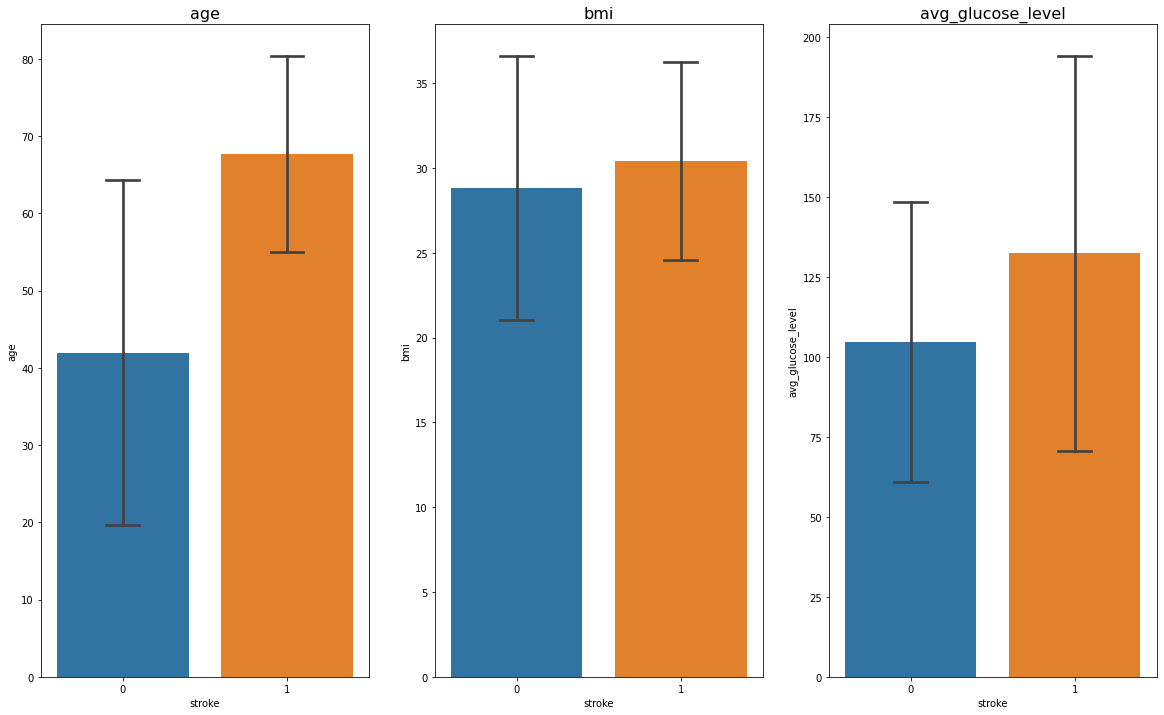

In [12]:
features_num = ["age", "bmi", "avg_glucose_level"]

fig, ax = plt.subplots(1, 3, figsize = (20, 12))

for i, ax in enumerate(fig.axes):
    g = sns.barplot(data = df, y = features_num[i], x = "stroke", ci = "sd",
                    capsize=.2, ax = ax)
    
    g.set_title(features_num[i], fontsize = 16)

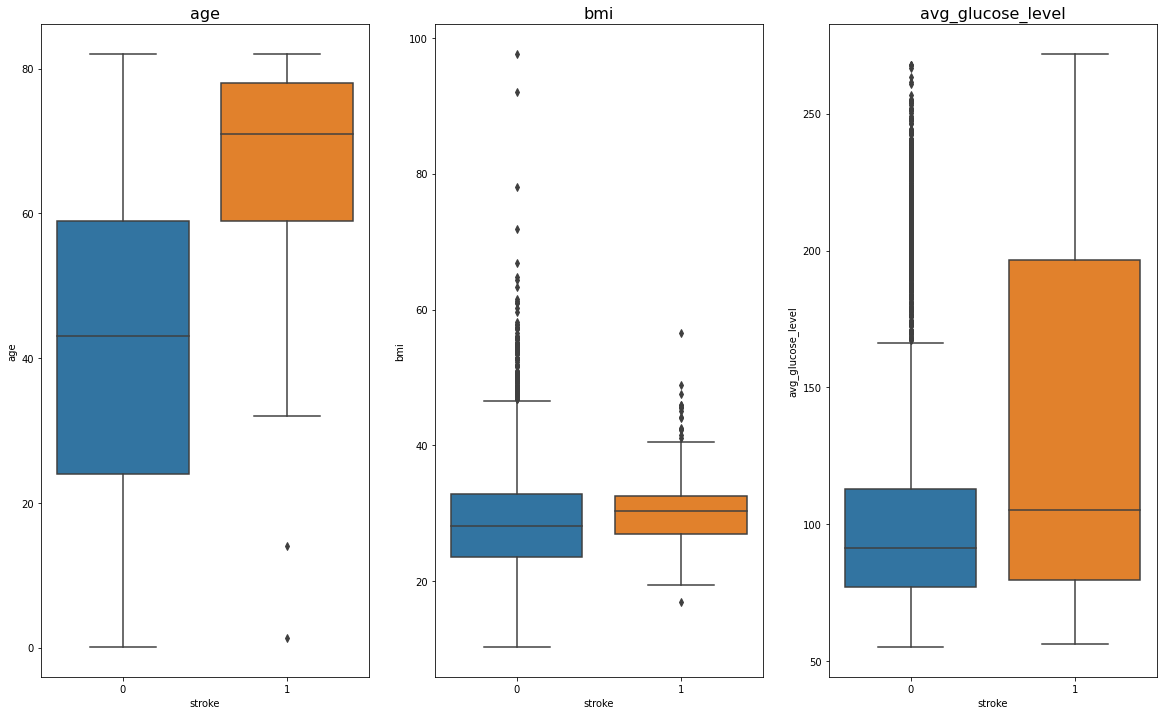

In [13]:
fig, ax = plt.subplots(1, 3, figsize = (20, 12))

for i, ax in enumerate(fig.axes):
    g = sns.boxplot(data = df, y = features_num[i], x = "stroke",
                    ax = ax)
    
    g.set_title(features_num[i], fontsize = 16)

Until this point we can see that variable "age" is very correlated with stoke classification. So we must take an especial attention about this variable. We might filter these variable using some other features. For exemple, is a little bit difficult to find a child less than 15 years who smoking or formerly smoked. Another point is a 'bmi' above 35 for a 15 years old is also hard to find.

In [14]:
#---------------------------------------- Filtering "age" feature ----------------------------------# 
filter_age      = df["age"] <= 15
filter_smoking  = df["smoking_status"] == "smokes"  
filter_smoking2 = df["smoking_status"] == "formerly smoked"
filter_bmi      = df["bmi"] >= 35
filter_gender   = df["gender"] == "Other"

array_filter = df[(filter_age & filter_smoking) | (filter_age & filter_smoking2) | (filter_age & filter_bmi) | (filter_gender)].index

new_df = df.drop(array_filter)
new_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 5074 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5074 non-null   int64  
 1   gender             5074 non-null   object 
 2   age                5074 non-null   float64
 3   hypertension       5074 non-null   int64  
 4   heart_disease      5074 non-null   int64  
 5   ever_married       5074 non-null   object 
 6   work_type          5074 non-null   object 
 7   Residence_type     5074 non-null   object 
 8   avg_glucose_level  5074 non-null   float64
 9   bmi                5074 non-null   float64
 10  smoking_status     5074 non-null   object 
 11  stroke             5074 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 515.3+ KB


### Correlation between stroke cases and categorical variables

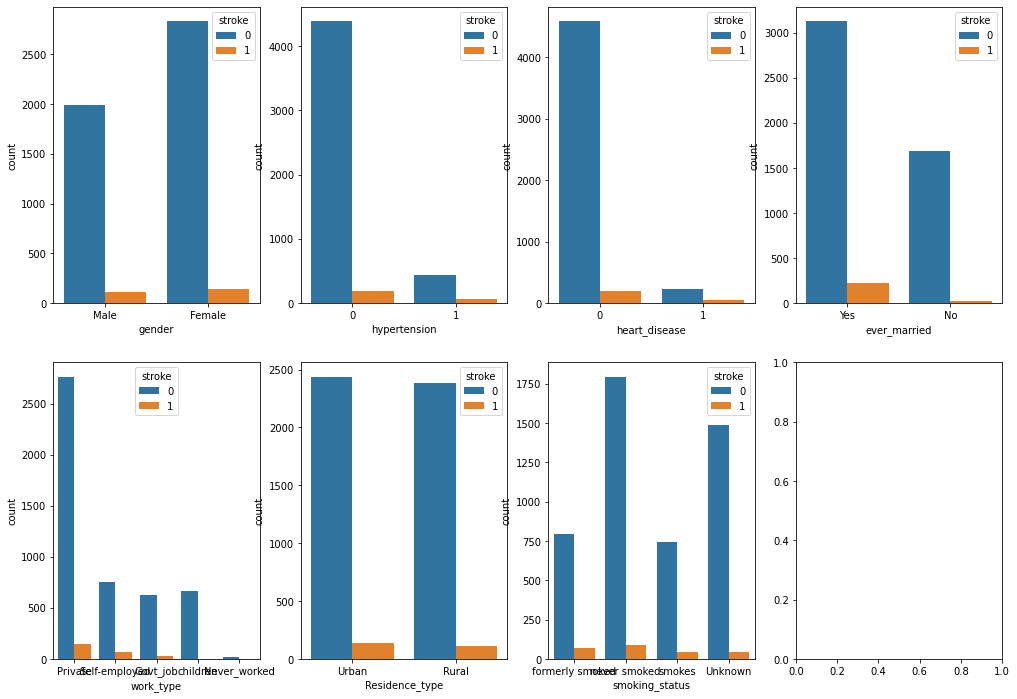

In [15]:
cat_var = ["gender", "hypertension", "heart_disease", "ever_married", "work_type", 
           "Residence_type","smoking_status"]

fig, ax = plt.subplots(2, 4, figsize = (17, 12))
cont = 0

for i, ax in enumerate(fig.axes):
    
    if cont < (7):
        sns.countplot(x = cat_var[i], hue = "stroke", data = new_df, ax = ax)
        
    cont += 1

Countplot is a way to see possible correlations between variables, however I think it isn't an easy one. Another form to check correlation is the frequency of stroke and no stroke cases in each feature's classification. 

In [16]:
#----------------------- Encoding hypertension and heart_disease features ------------------------#
new_df["New_hypertension"] = new_df["hypertension"].map({0: "no_hyper", 1: "hyper"})
new_df["New_heart_disease"] = new_df["heart_disease"].map({0: "no_disease", 1: "disease"})
new_df["New_ever_married"] = new_df["ever_married"].map({"Yes": "married", "No": "no_married"})

#------------------------------------- List of categorical features ----------------------------------------#
cat_var = ["gender", "New_hypertension", "New_heart_disease", "New_ever_married", "work_type", 
           "Residence_type","smoking_status"]

#--------------------- Extract proportion of stoke cases in each feature's classification ------------------#
dict_prop = {}
for i, var in enumerate(cat_var):
    total = 0
    
    for j, classif in enumerate(new_df[var].unique()):
        
        for k in range(2): #for stroke classification
            if j < len(new_df[var][new_df["stroke"] == k].value_counts()):
                total += new_df[var][new_df["stroke"] == k].value_counts()[j]
        
        prop_no_stroke =  new_df[var][df["stroke"] == 0].value_counts()[j]/total
        
        if j < len(new_df[var][new_df["stroke"] == k].value_counts()):
            prop_stroke =  new_df[var][df["stroke"] == 1].value_counts()[j]/total
            dict_prop[classif] = [prop_no_stroke, prop_stroke]
            
        else:
            dict_prop[classif] = [prop_no_stroke, 0.0]
            
        total = 0

#------------------------- Converting dictionary of proportions to dataframe ------------------------------#
df_prop = pd.DataFrame(dict_prop)
df_prop.head()

,Male,Female,no_hyper,hyper,disease,no_disease,married,no_married,Private,Self-employed,Govt_job,children,Never_worked,Urban,Rural,formerly smoked,never smoked,smokes,Unknown
0,0.952637,0.948498,0.960009,0.86747,0.957899,0.82971,0.934387,0.983149,0.948868,0.920538,0.952518,0.996805,1.0,0.947552,0.9544,0.95228,0.955128,0.944181,0.946565
1,0.047363,0.051502,0.039991,0.13253,0.042101,0.17029,0.065613,0.016851,0.051132,0.079462,0.047482,0.003195,0.0,0.052448,0.0456,0.04772,0.044872,0.055819,0.053435


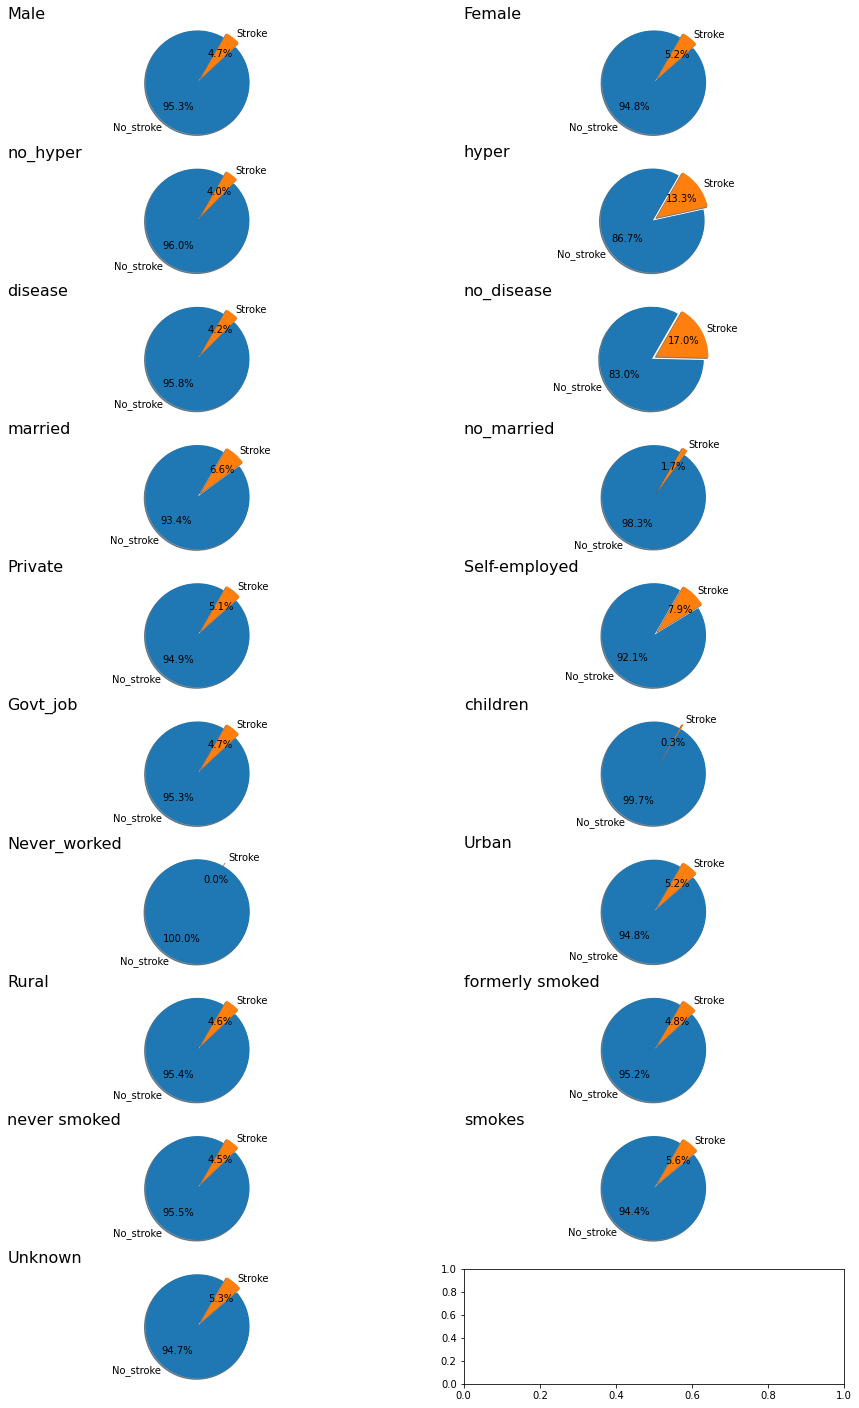

In [17]:
#------------------------------------- Parameters of Pie plot --------------------------------------------#
n = 10
m = 2
fig , ax = plt.subplots(n, m, figsize = (15, 25))
cont = 0
var = df_prop.columns
explode = (0, 0.1)  


#------------------------------------------ Iterative plot -----------------------------------------------#
for i in range(n):
    for j in range(m):
        
        if cont < ((n*m)-1):
            ax[i,j].pie(df_prop[var[cont]], labels = ["No_stroke", "Stroke"], explode=explode,
                        autopct='%1.1f%%', shadow=True, startangle=60)
        
            ax[i,j].axis('equal')
            ax[i,j].set_title(df_prop.columns[cont], loc = "left", fontsize = 16)
        
        cont +=1

Now is easy to see what features are correlated with stroke cases. For example the features "hypertension" and "heart_disease" are correlated with stroke. The proportion of "stroke" and "no stroke" cases are different when we change the classification of these features. On the other hand, the feature "gender" doens't seem make much difference about stroke cases, once the frequency in both classifications are almost the same.

### Proportion of stroke and not stroke cases

Text(0.5, 1.0, 'Frequency of stroke cases')

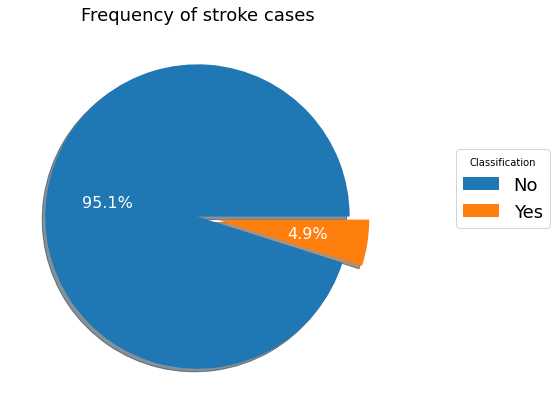

In [18]:
#---------------------------------------- Parameters of Pie plot ---------------------------------------------#
plt.figure(figsize = (12, 7))
labels = ["No", "Yes"]
explode = (0, 0.13)
count_stroke = new_df["stroke"].value_counts()
text = {"color": 'w', "fontsize": 16}


#---------------------------------------------- Pie plot -----------------------------------------------------#
plt.pie(count_stroke, labels = labels, 
        explode = explode, autopct='%1.1f%%', 
        shadow=True, startangle = 0,textprops = text)


#------------------------------------------- Pie plot legend -------------------------------------------------#
plt.legend(labels,
          title="Classification",
          loc="upper right",
           prop={'size': 18},
           bbox_to_anchor=(0.7, 0., 0.75, 0.7))

plt.title("Frequency of stroke cases", fontsize = 18)

It's very clear there is an imbalance for stroke target. This might be a problem for model construction. In this situation we have to balance this target.

<AxesSubplot:xlabel='stroke', ylabel='count'>

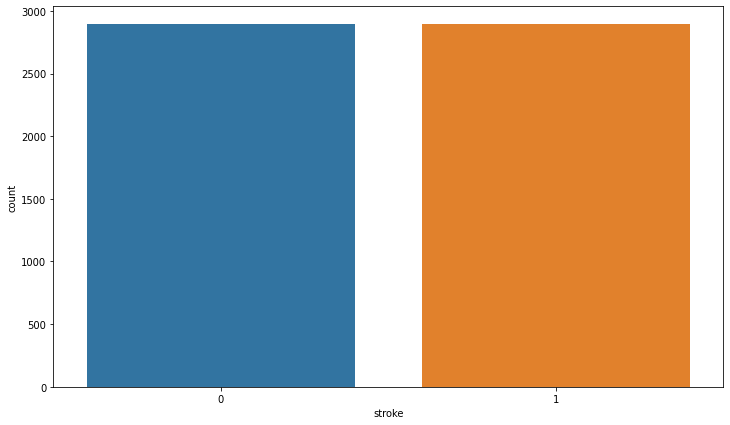

In [19]:
#--------------------------------- Features to be encodered -------------------------------#
columns = ["Residence_type", "gender", "hypertension", "heart_disease", 
           "ever_married","work_type", "smoking_status"]


#-------------------------------- Features to be eliminated -------------------------------#
eliminate = ["stroke", "id", "New_hypertension", 
             "New_heart_disease", "New_ever_married"]


#-----------------------------------Target and Dataframe ----------------------------------#
target = new_df["stroke"]
new_df = new_df.drop(columns = eliminate)


#---------------------------------------- Encoder -----------------------------------------#
le = preprocessing.OrdinalEncoder()
new_df[columns] = le.fit_transform(new_df[columns])


#------------------------------------Train and test data ----------------------------------#
x_train, x_test, y_train, y_test = train_test_split(new_df, target, 
                                                    test_size = 0.4, random_state = 0)


#------------------------------------ Target balancing ------------------------------------#
oversample = SMOTE()
x, y = oversample.fit_resample(x_train, y_train)

plt.figure(figsize = (12, 7))
sns.countplot(x = y)

### Machine learning models 

In [20]:
def model(x_train, x_test, y_train, y_test):
    
    
    RFC = RandomForestClassifier(random_state = 0)
    DTC = DecisionTreeClassifier(random_state = 0)
    GNB = GaussianNB()
    SVM = SVC(random_state = 0)
    GBC = GradientBoostingClassifier(random_state = 0)
    RC  = RidgeClassifier(random_state = 0)
    
    #---------------------------------- Fit models --------------------------------#
    model_RFC = RFC.fit(x_train, y_train)
    model_DTC = DTC.fit(x_train, y_train)
    model_GNB = GNB.fit(x_train, y_train)
    model_SVM = SVM.fit(x_train, y_train)
    model_GBC = GBC.fit(x_train, y_train)
    model_RC  = RC.fit(x_train, y_train)
    
    #--------------------------------- Predictions --------------------------------#
    prd_RFC = model_RFC.predict(x_test)
    prd_DTC = model_DTC.predict(x_test)
    prd_GNB = model_GNB.predict(x_test)
    prd_SVM = model_SVM.predict(x_test)
    prd_GBC = model_GBC.predict(x_test)
    prd_RC  = model_RC.predict(x_test)
    
    #-------------------------------- Accuracy ------------------------------------#
    acc_RFC = accuracy_score(y_test, prd_RFC)
    acc_DTC = accuracy_score(y_test, prd_DTC)
    acc_GNB = accuracy_score(y_test, prd_GNB)
    acc_SVM = accuracy_score(y_test, prd_SVM)
    acc_GBC = accuracy_score(y_test, prd_GBC)
    acc_RC  = accuracy_score(y_test, prd_RC)
    accuracy = [acc_RFC, acc_DTC, acc_GNB, acc_SVM, acc_GBC, acc_RC]
    
    #---------------------------- Confusion matrix --------------------------------#
    matrix_RFC = confusion_matrix(y_test, prd_RFC)
    matrix_DTC = confusion_matrix(y_test, prd_DTC)
    matrix_GNB = confusion_matrix(y_test, prd_GNB)
    matrix_SVM = confusion_matrix(y_test, prd_SVM)
    matrix_GBC = confusion_matrix(y_test, prd_GBC)
    matrix_RC  = confusion_matrix(y_test, prd_RC)
    matrix = [matrix_RFC, matrix_DTC, matrix_GNB, matrix_SVM, matrix_GBC, matrix_RC]
    
    return accuracy, matrix


#----------------------------- Applying 'model' function --------------------------#
accuracy, matrix = model(x, x_test, y, y_test)   

### Accuracy of each preditive model

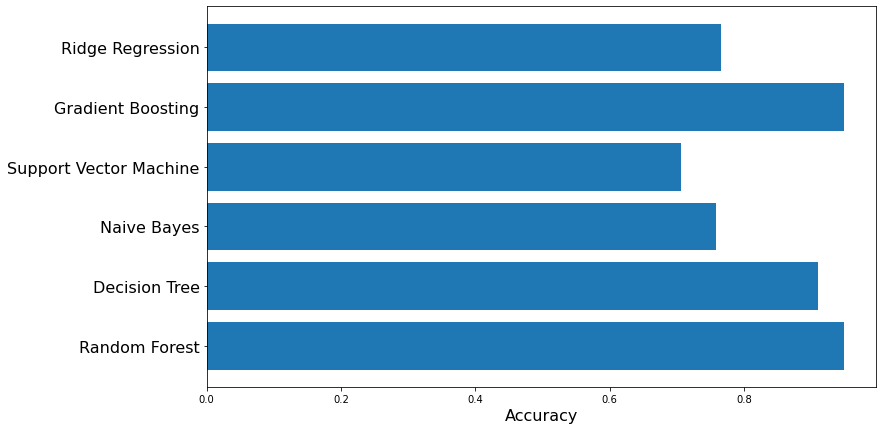

In [21]:
def plot(acc, labels):

    fig, ax = plt.subplots(figsize = (12, 7))
    x = np.arange(len(labels))

    ax.barh(x, accuracy)
    ax.set_yticks(x)
    ax.set_yticklabels(labels, fontsize = 16)
    ax.set_xlabel("Accuracy", fontsize = 16)

    
    
    
    
#------------------------------ Applying 'plot' function ----------------------------#    
labels = ('Random Forest', 'Decision Tree', 'Naive Bayes', 
          'Support Vector Machine', "Gradient Boosting",
          "Ridge Regression") 

plot(accuracy, labels)

### Confusion matrix for each preditive model

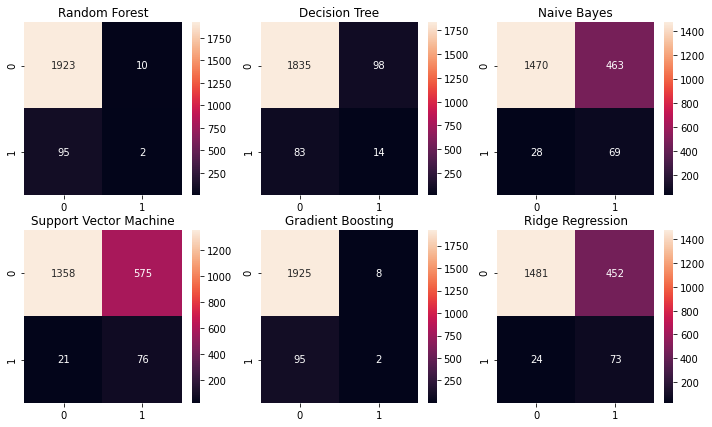

In [22]:
fig, ax = plt.subplots(2, 3, figsize = (12, 7))

for i, ax in enumerate(fig.axes):
    
    if i < len(matrix):
        g = sns.heatmap(matrix[i], annot=True ,fmt='', ax = ax)
        
        g.set_title(labels[i])   

Here we have an interesting point. Accuracy tells us 'Random Forest' and 'Gradient Boosting' as best models. However, taking a look at confusion matrix we can see these models are good for classificate no_stroke cases. On the ohter hand they are very bad for classificate a stroke case. In a physical point of view is better a model with good detection in stroke case (because is terrible disease) then a no_stroke case. So, "Naive Bayes", "Ridge" and "SVM" are more suitable models.

## References:

* Mayo Clinic; **Stroke**; <https://www.mayoclinic.org/diseases-conditions/stroke/symptoms-causes/syc-20350113>
* Wedro, B.; **Stroke**; <https://www.medicinenet.com/stroke_symptoms_and_treatment/article.htm>